In [394]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

from xgboost import XGBClassifier

In [395]:
#Training data
evyatar_alon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Evyatar Cohen\Evyatar636771054555711409Alone.csv',)
evyatar_spon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Evyatar Cohen\Evyatar636771052727603804Spontan.csv')
evyatar_sync = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Evyatar Cohen\Evyatar636771053639929594Sync.csv')

nofar_alon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Nofar Social_Nuero\Nofar636759796290435160Alone.csv')
nofar_spon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Nofar Social_Nuero\Nofar636759795182793299Spontan.csv')
nofar_sync = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Nofar Social_Nuero\Nofar636759797397919664Sync.csv')

oriya_alon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Oriya Social_Nuero\Oriya636759805268396661Alone.csv')
oriya_spon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Oriya Social_Nuero\Oriya636759804404113837Spontan.csv')
oriya_sync = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Oriya Social_Nuero\Oriya636759806131350399Sync.csv')

orya2_alon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Orya Kalmanovitz\OryaB636771082736601528Alone.csv')
orya2_spon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Orya Kalmanovitz\OryaB636771083605535985Spontan.csv')
orya2_sync = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Orya Kalmanovitz\OryaB636771084494502229Sync.csv')

revital_alon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Revital Marbel\Revital636770955999435879Alone.csv')
revital_spon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Revital Marbel\Revital636770957038873193Spontan.csv')
revital_sync = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Revital Marbel\Revital636770957894370062Sync.csv')

shahar_alon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Shahar Terner\Sachar636771047408504303Alone.csv')
shahar_spon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Shahar Terner\Sachar636771045591258071Spontan.csv')
shahar_sync = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Shahar Terner\Sachar636771046527112972Sync.csv')

shelly_alon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Shelly Social_Nuero\Shelly636759788383205274Alone.csv')
shelly_spon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Shelly Social_Nuero\Shelly636759787508979097Spontan.csv')
shelly_sync = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Shelly Social_Nuero\Shelly636759789526313406Sync.csv')

yael_alon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Yael Hagai\Yael636771061659067649Alone.csv')
yael_spon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Yael Hagai\Yael636771059544754823Spontan.csv')
yael_sync = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Yael Hagai\Yael636771060699529085Sync.csv')

yoel_alon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Yoel Raz\Yoel636760922573364655Alone.csv')
yoel_spon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Yoel Raz\Yoel636760921663075813Spontan.csv')
yoel_sync = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Training\Yoel Raz\Yoel636760923490742912Sync.csv')

In [396]:
#Testing data
itiel_alon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Validation\Itiel Lab\Itiel636770942529041679Alone.csv')
itiel_spon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Validation\Itiel Lab\Itiel636770940701219076Spontan.csv')
itiel_sync = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Validation\Itiel Lab\Itiel636770941638547912Sync.csv')

mor_alon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Validation\Mor SHerman\Mor636771066407626524Alone.csv')
mor_spon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Validation\Mor SHerman\Mor636771064635567065Spontan.csv')
mor_sync = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Validation\Mor SHerman\Mor636771065531910215Sync.csv')

oded_alon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Validation\Oded Medina\Oded636754669540564461Alone.csv')
oded_spon = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Validation\Oded Medina\Oded636754670490266956Spontan.csv')
oded_sync = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\Validation\Oded Medina\Oded636754671560850581Sync.csv')

In [397]:
right_hand = pd.read_csv(r'C:\Users\guyit\Desktop\extraFiles\HandRight.csv')
right_hand.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,right,1,15.67167,226.2064,20.26470,34.26665,-195.214700,-35.043020,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.24119,222.9389,20.11781,36.16443,-180.093900,-4.052799,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.72461,220.9709,19.94972,26.35298,-95.088190,-11.157620,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.09016,219.7124,19.67679,19.46804,-61.755180,-21.303780,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.46017,219.3652,19.13128,21.94964,-8.355943,-35.081790,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0


In [398]:
right_hand = right_hand[right_hand[' Hand Type']=='right']
right_hand.dropna(inplace=True)
right_hand.reset_index(drop=True,inplace=True)
right_hand.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,right,1,15.67167,226.2064,20.26470,34.26665,-195.214700,-35.043020,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.24119,222.9389,20.11781,36.16443,-180.093900,-4.052799,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.72461,220.9709,19.94972,26.35298,-95.088190,-11.157620,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.09016,219.7124,19.67679,19.46804,-61.755180,-21.303780,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.46017,219.3652,19.13128,21.94964,-8.355943,-35.081790,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0


the next function takes alone data and adding to it the "right_hand" data, and then reshaping it to the shape of the sync asnd spon data.

In [399]:
def alone_transform (original_data):
    
    data = original_data.copy()
    data = data[data[' Hand Type']=='left']
    data.reset_index(drop=True,inplace = True)
    data['new']=list(np.arange(0.5,len(data)))
    data.set_index('new',inplace=True)
    length = min(len(right_hand),len(data))
    data = pd.concat([right_hand,data]).sort_index()
    data.reset_index(drop=True,inplace = True)    
    data=data.iloc[:length*2]
    
    data.loc[data[' Hand Type']=='right','Time'] = list(data.loc[data[' Hand Type']=='left','Time'])
    data.loc[data[' Hand Type']=='right',' Frame ID'] = list(data.loc[data[' Hand Type']=='left',' Frame ID'])
    
    return data

the get data function takes the data and do this actions:
- puting each instance of "right" and "left" with the same time and frame id in the same row. 
- deleting the first 7 seconds of the data
- adding the "Time_range" column represnting the number of second each instance belongs to (sec_1,sec_2...).
- takes the mean of each feature for every second and creating DataFrame

the result is a DataFrame where each row represent a second in the expirement and have the information of both hands.

In [293]:
def get_data(original_data):
    data = original_data.copy()
    
    data_left = data.loc[data[' Hand Type']=='left']
    data_right = data.loc[data[' Hand Type']=='right']
    data= pd.merge(data_left,data_right,how='outer',on=['Time',' Frame ID',' # hands'])
    
    
    data = data[data['Time']>data['Time'].min()+7]
    total_time =int(np.round(data['Time'].max()-data['Time'].min()))
    data.drop([' Hand Type_x',' Hand Type_y'],axis=1,inplace=True)
    names = []
    for i in range(1,total_time+1):
        name = 'sec_'+str(i)
        names.append(name)
    data['Time_range']=pd.cut(data['Time'], total_time,labels=names)
    dfs = []
    for name in names:
        df = data[data.Time_range == name].copy()
        df.drop('Time_range',axis=1,inplace=True)
        dfs.append(df.mean())
    df = pd.DataFrame(dfs)
    
    return df

In [294]:
def get_data2(dfs_list, alone):
    new_dfs_list = []
    for i in dfs_list:
        if alone == True:
            i = alone_transform(i)
        df = get_data(i)
        new_dfs_list.append(df)
    df = pd.concat(new_dfs_list)
    return df

In [295]:
alon_train_list = [evyatar_alon,nofar_alon,oriya_alon,orya2_alon,revital_alon,shahar_alon,shelly_alon,yael_alon,yoel_alon]
spon_train_list = [evyatar_spon,nofar_spon,oriya_spon,orya2_spon,revital_spon,shahar_spon,shelly_spon,yael_spon,yoel_spon]
sync_train_list = [evyatar_sync,nofar_sync,oriya_sync,orya2_sync,revital_sync,shahar_sync,shelly_sync,yael_sync,yoel_sync]
alon_train = get_data2(alon_train_list, True)
spon_train = get_data2(spon_train_list, False)
sync_train = get_data2(sync_train_list, False)

now we will just label each class and join them into 1 DataFrame:
- 0 Alone
- 1 Spontaneous
- 2 Synchronized

In [616]:
alon_train['label']=0
spon_train['label']=1
sync_train['label']=2

In [617]:
train_data = pd.concat([alon_train,spon_train,sync_train])
train_data.dropna(inplace= True)
train_data.reset_index(drop=True,inplace=True)
train_data

,Time,Frame ID,# hands,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,...,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,label
0,526.315626,150485.459016,1.0,-63.601344,194.602341,-5.092831,15.258862,16.887075,-8.564255,1.012492,...,57.838103,228.590925,34.130049,243.805815,149.195903,209.515257,0.000000,0.288033,0.000000,0
1,527.317895,150601.000000,1.0,-71.387783,189.523143,20.757033,-14.430610,5.981975,40.724328,1.136519,...,60.786877,179.041623,67.902561,228.998635,131.059657,266.540677,0.000000,0.429207,0.000000,0
2,528.320197,150716.475410,1.0,-96.376269,219.938684,51.600185,-64.860460,22.752794,15.176658,1.667944,...,39.576951,151.406594,87.504953,157.684219,51.203390,303.308315,0.000000,0.099699,0.000000,0
3,529.322495,150832.116667,1.0,-84.242347,205.937767,27.155208,-15.838130,-9.035067,-19.995632,1.190250,...,24.065733,198.163980,128.703162,168.019113,67.356078,315.586692,0.000000,0.078590,0.000000,0
4,530.324746,150947.606557,1.0,-95.340634,199.808418,21.161185,60.852483,80.917709,-12.858534,0.080242,...,42.935365,177.855493,117.569928,175.881149,47.730589,313.079969,0.006158,0.528488,0.001846,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,851.848190,67029.633333,2.0,-86.438101,211.999847,-5.398529,-2.839621,-0.500911,4.647576,1.463324,...,128.381477,138.398993,28.787091,278.107213,-71.903140,45.055440,0.000000,0.000000,0.000000,2
1791,852.830845,67085.931034,2.0,-74.242221,186.416952,-17.982182,29.136065,-50.746404,-2.600719,1.043515,...,121.553207,132.476428,41.517320,283.560241,-59.896594,71.999774,0.000000,0.000000,0.000000,2
1792,853.830590,67149.161290,2.0,-64.930063,156.319674,-18.043733,-14.098904,26.271004,8.208287,0.460493,...,123.787935,138.856290,52.418434,307.619419,-3.127568,157.825039,0.000000,0.000000,0.000000,2
1793,854.846817,67216.100000,2.0,-75.741943,199.771757,-0.132725,5.092049,-18.327061,-5.748546,1.097365,...,128.189367,143.756723,53.262791,301.932363,-46.412502,67.148181,0.000000,0.000000,0.000000,2


In [618]:
y_train=train_data['label']
X_train=train_data.drop(['label','Time',' Frame ID',' # hands'], axis = 1)

we will do the same for the test data.

In [619]:
alon_test_list = [itiel_alon,mor_alon,oded_alon]
spon_test_list = [itiel_spon,mor_spon,oded_spon]
sync_test_list = [itiel_sync,mor_sync,oded_sync]
alon_test = get_data2(alon_test_list, True)
spon_test = get_data2(spon_test_list, False)
sync_test = get_data2(sync_test_list, False)
alon_test['label']=0
spon_test['label']=1
sync_test['label']=2

In [620]:
test_data = pd.concat([alon_test,spon_test,sync_test])
test_data.dropna(inplace= True)
test_data.reset_index(drop=True,inplace=True)
test_data

,Time,Frame ID,# hands,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,...,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,label
0,962.569410,112231.836066,1.0,-28.914367,188.443282,38.067642,171.845016,-87.586825,-35.785870,0.649238,...,57.838103,228.590925,34.130049,243.805815,149.195903,209.515257,0.000000,0.288033,0.000000,0
1,963.571697,112345.600000,1.0,-44.775555,246.688303,48.277045,-150.399832,62.997502,51.916038,1.079674,...,60.786877,179.041623,67.902561,228.998635,131.059657,266.540677,0.000000,0.429207,0.000000,0
2,964.574005,112460.573770,1.0,-142.092857,239.311211,79.179402,78.809135,-84.740307,9.280622,0.800768,...,39.576951,151.406594,87.504953,157.684219,51.203390,303.308315,0.000000,0.099699,0.000000,0
3,965.576275,112576.200000,1.0,33.590769,219.474688,72.819712,66.264784,131.218271,-44.403816,0.898718,...,24.065733,198.163980,128.703162,168.019113,67.356078,315.586692,0.000000,0.078590,0.000000,0
4,966.570263,112690.766667,1.0,-69.417428,295.930537,81.453348,-159.709485,-29.983742,90.666195,0.931790,...,42.762030,178.497788,117.369019,175.965633,47.895340,312.417992,0.004366,0.522552,0.001877,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,994.398833,65851.166667,2.0,-105.578409,245.265533,80.653771,-43.429852,94.483171,38.945531,0.693500,...,136.005650,218.658047,151.677510,343.954753,63.732664,205.971723,0.000000,0.247785,0.000000,2
601,995.398703,65932.266667,2.0,-107.648578,252.577960,71.463176,38.496636,37.602698,-38.622559,1.237176,...,168.802927,213.200210,134.240843,364.643857,43.930002,184.986430,0.000000,0.199161,0.000000,2
602,996.402163,66013.066667,2.0,-100.774471,283.170993,88.902476,4.903271,49.043636,26.846866,1.595073,...,159.230147,254.832587,103.756562,354.747373,78.496202,134.419187,0.000000,0.000000,0.000000,2
603,997.401413,66094.233333,2.0,-82.638367,306.071643,80.635047,-21.710642,-151.550564,-35.674045,1.594661,...,184.693567,236.807837,103.448987,382.971443,69.159321,149.196670,0.000000,0.130568,0.000000,2


In [621]:
y_test = test_data['label']
X_test = test_data.drop(['label','Time',' Frame ID',' # hands'], axis = 1)

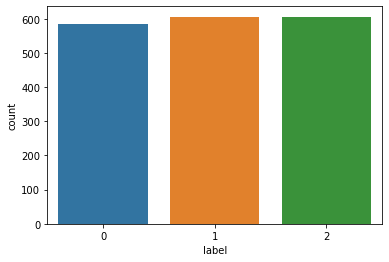

In [622]:
sns.countplot(train_data['label'])

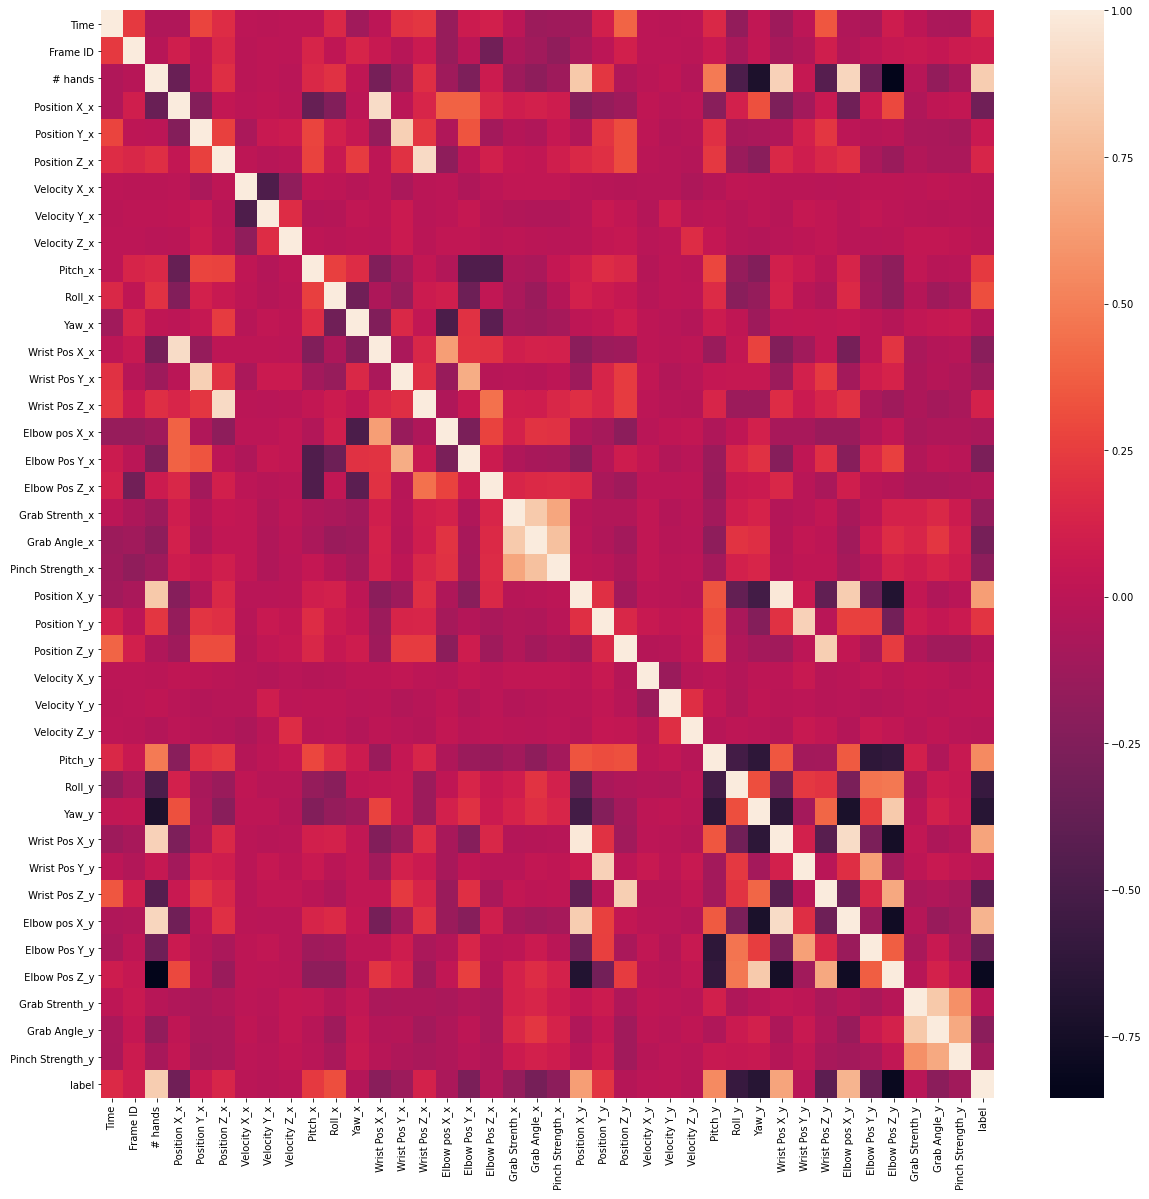

In [623]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_data.corr(), annot=False)

In [624]:
sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)

now we will train a few models on the train data and check their preformence on the test data.

In [625]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xg = XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')
ada = AdaBoostClassifier()

In [626]:
models = [knn, dtc, rfc, xg, ada]
for model in models:
    model.fit(scaled_train,y_train)
    y_pred =model.predict(scaled_test)
    print(str(model)+':')
    print(classification_report(y_test,y_pred))
    print('accurracy: ',metrics.accuracy_score(y_test,y_pred))
    print()

KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       199
           1       0.82      0.90      0.86       204
           2       0.88      0.80      0.84       202

    accuracy                           0.89       605
   macro avg       0.90      0.89      0.89       605
weighted avg       0.90      0.89      0.89       605

accurracy:  0.8942148760330578

DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       199
           1       0.69      0.80      0.74       204
           2       0.74      0.63      0.68       202

    accuracy                           0.80       605
   macro avg       0.81      0.80      0.80       605
weighted avg       0.81      0.80      0.80       605

accurracy:  0.8033057851239669

RandomForestClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00

so far its look like the best model is the knn with 89.42 accuracy score. lets have a closer look on the results.

In [627]:
y_pred = knn.predict(scaled_test)

Text(33.0, 0.5, 'Actual')

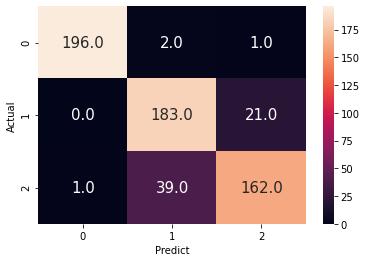

In [628]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

next i will use GridSearchCV to tune the parameters of each algorithem.

In [517]:
pipe_knn = Pipeline(steps=[('sc',sc), ('knn', knn)])
pipe_dtc = Pipeline(steps=[('sc',sc), ('dtc', dtc)])
pipe_rfc = Pipeline(steps=[('sc',sc), ('rfc', rfc)])
pipe_xg = Pipeline(steps=[('sc',sc), ('xg', xg)])
pipe_ada = Pipeline(steps=[('sc',sc), ('ada', ada)])

In [76]:
param_knn = {
    'knn__n_neighbors': list(range(2,21)),
    'knn__weights': ['uniform','distance']
}

In [77]:
path = dtc.cost_complexity_pruning_path(X_train,y_train)
alphas = path.ccp_alphas
param_dtc = {'dtc__ccp_alpha':alphas}

In [78]:
param_rfc = {'rfc__n_estimators':[100,200,300,400,500],
    'rfc__max_depth' : list(range(2,21,2))}

In [79]:
xg_param = {
   'xg__learning_rate' : np.linspace(0.3,1,8),
    'xg__n_estimators':[100,200,300,400,500],
    'xg__max_depth' : list(range(2,21,2))
}

In [80]:
ada_param = {
   'ada__learning_rate' : np.linspace(0.3,1,8),
    'ada__n_estimators':[100,200,300,400,500],
}

In [523]:
grid_knn = GridSearchCV(pipe_knn, param_knn, cv=10, scoring='accuracy')
grid_dtc = GridSearchCV(pipe_dtc, param_dtc, cv=10, scoring='accuracy')
grid_rfc = GridSearchCV(pipe_rfc, param_rfc, cv=10, scoring='accuracy')
grid_xg = GridSearchCV(pipe_xg, xg_param, cv=10, scoring='accuracy')
grid_ada = GridSearchCV(pipe_ada, ada_param, cv=10, scoring='accuracy')

In [238]:
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [239]:
grid_dtc.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('dtc', DecisionTreeClassifier())]),
             param_grid={'dtc__ccp_alpha': array([0.        , 0.00052228, 0.00054318, 0.00055087, 0.00055534,
       0.0007428 , 0.0007428 , 0.00083183, 0.00083565, 0.00083565,
       0.00083565, 0.00092851, 0.00092851, 0.00097493, 0.00099041,
       0.00100279, 0.00100279, 0.00100809, 0.00100875, 0.00103462,...
       0.00154923, 0.00167131, 0.00168126, 0.00173559, 0.00196981,
       0.00201751, 0.00202583, 0.00208272, 0.00220578, 0.00267409,
       0.00271072, 0.00280463, 0.00292479, 0.00298708, 0.00300836,
       0.00302029, 0.00327577, 0.00340734, 0.00366054, 0.00368442,
       0.00445717, 0.00461051, 0.00487927, 0.00539967, 0.00547898,
       0.00549212, 0.00714911, 0.01171305, 0.01607606, 0.01680635,
       0.02503486, 0.11881798, 0.30789088])},
             scoring='accuracy')

In [240]:
grid_rfc.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'rfc__n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [248]:
grid_xg.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('xg',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      eval_metric='mlogloss',
                                                      gamma=0, gpu_id=-1,
                                                      importance_type='gain',
                                                      interaction_constraints='',
                                                      learning_rate=0.300000012,
                                                      max_delta_step=0,
                                       

In [250]:
grid_ada.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('ada', AdaBoostClassifier())]),
             param_grid={'ada__learning_rate': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'ada__n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [245]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)

{'knn__n_neighbors': 6, 'knn__weights': 'distance'}
0.8812849162011174


In [246]:
print(grid_dtc.best_params_)
print(grid_dtc.best_score_)

{'dtc__ccp_alpha': 0.00714910705447842}
0.8674115456238362


In [247]:
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'rfc__max_depth': 18, 'rfc__n_estimators': 200}
0.8946741154562383


In [249]:
print(grid_xg.best_params_)
print(grid_xg.best_score_)

{'xg__learning_rate': 0.5, 'xg__max_depth': 4, 'xg__n_estimators': 100}
0.9052576039726878


In [251]:
print(grid_ada.best_params_)
print(grid_ada.best_score_)

{'ada__learning_rate': 0.6, 'ada__n_estimators': 100}
0.7965083798882682


now we will train the tuned models and check thier preformance on the test data.

In [629]:
knn = KNeighborsClassifier(n_neighbors =  6, weights= 'distance')
dtc = DecisionTreeClassifier(ccp_alpha =  0.00714910705447842)
rfc = RandomForestClassifier(max_depth = 18, n_estimators = 200)
xg = XGBClassifier(use_label_encoder=False,eval_metric='mlogloss',learning_rate = 0.5, max_depth = 4, n_estimators = 100)
ada = AdaBoostClassifier(learning_rate = 0.6, n_estimators = 100)

In [630]:
models = [knn, dtc, rfc, xg, ada]
for model in models:
    model.fit(scaled_train,y_train)
    y_pred =model.predict(scaled_test)
    print(str(model)+':')
    print(classification_report(y_test,y_pred))
    print('accurracy: ',metrics.accuracy_score(y_test,y_pred))
    print()

KNeighborsClassifier(n_neighbors=6, weights='distance'):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       199
           1       0.79      0.91      0.85       204
           2       0.89      0.78      0.83       202

    accuracy                           0.89       605
   macro avg       0.89      0.89      0.89       605
weighted avg       0.89      0.89      0.89       605

accurracy:  0.8876033057851239

DecisionTreeClassifier(ccp_alpha=0.00714910705447842):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       199
           1       0.64      0.76      0.69       204
           2       0.69      0.55      0.61       202

    accuracy                           0.77       605
   macro avg       0.77      0.77      0.77       605
weighted avg       0.77      0.77      0.77       605

accurracy:  0.768595041322314

RandomForestClassifier(max_depth=18, n_estimators=200):
       

except for the Ada and the random forest classiffiers ,the tuned models preformance is worse than the untuned models on the test data. 

i will try using voting clasiffier and stacking classifiers to make a better model

In [631]:
pipe_knn = Pipeline(steps=[('sc',sc), ('knn', knn)])
pipe_dtc = Pipeline(steps=[('sc',sc), ('dtc', dtc)])
pipe_rfc = Pipeline(steps=[('sc',sc), ('rfc', rfc)])
pipe_xg = Pipeline(steps=[('sc',sc), ('xg', xg)])
pipe_ada = Pipeline(steps=[('sc',sc), ('ada', ada)])

In [532]:
vot = VotingClassifier(estimators=[('dtc', pipe_dtc), ('knn', pipe_knn), ('rfc', pipe_rfc), ('xg', pipe_xg),('ada', pipe_ada)],
voting='soft')

In [533]:
cross_val_score(vot,X_train,y_train,cv=10,scoring='accuracy').mean()

0.9091247672253259

In [565]:
vot2 = VotingClassifier(estimators=[('dtc', pipe_dtc), ('knn', pipe_knn), ('rfc', pipe_rfc), ('xg', pipe_xg)],
voting='soft')

In [535]:
cross_val_score(vot2,X_train,y_train,cv=10,scoring='accuracy').mean()

0.9102451893234015

In [537]:
stc = StackingClassifier(estimators=[('dtc', pipe_dtc), ('knn', pipe_knn), ('rfc', pipe_rfc), ('xg', pipe_xg),('ada', pipe_ada)]
                        , final_estimator=KNeighborsClassifier())

In [538]:
cross_val_score(stc,X_train,y_train,cv=10,scoring='accuracy').mean()

0.8885723153320919

its look like the second voting classiffier have the best score on the training data. lets try  him on the test data.

In [566]:
vot2.fit(X_train,y_train)

VotingClassifier(estimators=[('dtc',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('dtc',
                                               DecisionTreeClassifier(ccp_alpha=0.00714910705447842))])),
                             ('knn',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=6,
                                                                    weights='distance'))])),
                             ('rfc',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('rfc',
                                               RandomForestClassifier(max_depth=18,
                                                                      n_esti...
                                                             inte

In [567]:
y_pred= vot2.predict(X_test)

In [569]:
print(classification_report(y_test,y_pred))
print('accurracy: ',metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       199
           1       0.70      0.98      0.81       204
           2       0.96      0.56      0.71       202

    accuracy                           0.85       605
   macro avg       0.88      0.85      0.84       605
weighted avg       0.88      0.85      0.84       605

accurracy:  0.8462809917355372


the model is doing good on the training data but cant keep his success rate on the test data.

Notice that while using GridSearchCV the data splits randomly the train data. this way each algorithem could be train on a part of the data of "evyatar_sync" for example and then tested on a part of it. its makes sense that if model saw the data of specific person he will preform well. thats the reason why the models have good scores in the cross validation.

# Another approach

Now instead of taking the mean of each second we will take 5 random instances to represent each second.

In [463]:
def get_data3(original_data):
    data = original_data.copy()
    
    data_left = data.loc[data[' Hand Type']=='left']
    data_right = data.loc[data[' Hand Type']=='right']
    data= pd.merge(data_left,data_right,how='outer',on=['Time',' Frame ID',' # hands'])
    
    
    data = data[data['Time']>data['Time'].min()+7]
    total_time =int(np.round(data['Time'].max()-data['Time'].min()))
    data.drop([' Hand Type_x',' Hand Type_y'],axis=1,inplace=True)
    names = []
    for i in range(1,total_time+1):
        name = 'sec_'+str(i)
        names.append(name)
    data['Time_range']=pd.cut(data['Time'], total_time,labels=names)
    dfs = []
    for name in names:
        df = data[data.Time_range == name].copy()
        df.drop('Time_range',axis=1,inplace=True)
        if len(df)>=5:
            dfs.append(df.sample(5,random_state=0))
    df = pd.concat(dfs)
    
    return df

In [464]:
def get_data4(dfs_list, alone, Names):
    new_dfs_list = []
    for i in range(len(dfs_list)):
        if alone == True:
            dfs_list[i] = alone_transform(dfs_list[i])
        df = get_data3(dfs_list[i])
        df['Name'] = Names[i]
        new_dfs_list.append(df)
    df = pd.concat(new_dfs_list)
    return df

In [465]:
Names_train = ['evyatar','nofar','oriya','orya2','revital','shahar','shelly','yael','yoel']
alon_train_list = [evyatar_alon,nofar_alon,oriya_alon,orya2_alon,revital_alon,shahar_alon,shelly_alon,yael_alon,yoel_alon]
spon_train_list = [evyatar_spon,nofar_spon,oriya_spon,orya2_spon,revital_spon,shahar_spon,shelly_spon,yael_spon,yoel_spon]
sync_train_list = [evyatar_sync,nofar_sync,oriya_sync,orya2_sync,revital_sync,shahar_sync,shelly_sync,yael_sync,yoel_sync]

In [466]:
alon_train = get_data4(alon_train_list, True, Names_train)
spon_train = get_data4(spon_train_list, False, Names_train)
sync_train = get_data4(sync_train_list, False, Names_train)

In [467]:
alon_train['label']=0
spon_train['label']=1
sync_train['label']=2

In [468]:
train_data = pd.concat([alon_train,spon_train,sync_train])
train_data.dropna(inplace= True)
train_data.reset_index(drop=True,inplace=True)
train_data

,Time,Frame ID,# hands,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,...,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,Name,label
0,526.2494,150478,1,-75.64795,208.0570,4.289408,-159.882300,147.918500,165.31770,1.277792,...,266.2482,28.91361,231.4959,173.573300,207.58400,0.0,0.203799,0.0,evyatar,0
1,526.3985,150495,1,-84.20128,209.4202,7.737921,29.019430,-172.198700,-94.16095,1.199381,...,269.0730,40.84514,229.7849,172.725100,217.93150,0.0,0.131205,0.0,evyatar,0
2,526.8125,150543,1,-40.31709,198.5134,-9.883607,52.858390,126.749100,-34.20219,0.916960,...,214.2249,25.20564,236.9125,129.205500,202.23030,0.0,0.156299,0.0,evyatar,0
3,526.2830,150482,1,-77.80249,204.6899,7.418883,-87.233720,-63.953620,64.45666,1.352130,...,272.9861,31.60332,230.6796,180.299200,210.01140,0.0,0.218192,0.0,evyatar,0
4,526.0007,150449,1,-46.60518,178.0750,-18.757020,5.439669,96.988980,-12.10281,0.670744,...,177.0225,32.89422,264.5838,141.679200,211.90740,0.0,0.657775,0.0,evyatar,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8844,855.4308,67255,2,-67.22385,158.4772,-16.321950,-23.862550,-90.743280,-39.36870,0.363893,...,148.2429,63.15283,327.1131,9.720168,158.29460,0.0,0.000000,0.0,yoel,2
8845,856.2958,67311,2,-81.57359,183.5054,-7.185198,-63.247310,121.752700,62.95970,0.762549,...,151.5924,68.17693,288.9688,-54.138200,94.23959,0.0,0.000000,0.0,yoel,2
8846,855.7963,67280,2,-67.80653,140.8804,-29.613030,-15.119600,31.189600,-13.89590,0.045157,...,151.0646,58.53401,342.6050,53.947960,171.96940,0.0,0.000000,0.0,yoel,2
8847,855.6957,67273,2,-66.50050,141.0165,-28.448420,-13.395220,6.641245,-10.97861,0.052881,...,150.6103,57.69265,341.7898,51.190650,170.77900,0.0,0.000000,0.0,yoel,2


In [469]:
y_train=train_data['label']
X_train=train_data.drop(['label','Time',' Frame ID',' # hands','Name'], axis = 1)

In [470]:
Names_test = ['itiel','mor','oded']
alon_test_list = [itiel_alon,mor_alon,oded_alon]
spon_test_list = [itiel_spon,mor_spon,oded_spon]
sync_test_list = [itiel_sync,mor_sync,oded_sync]
alon_test = get_data4(alon_test_list, True, Names_test)
spon_test = get_data4(spon_test_list, False, Names_test)
sync_test = get_data4(sync_test_list, False, Names_test)
alon_test['label']=0
spon_test['label']=1
sync_test['label']=2

In [471]:
test_data = pd.concat([alon_test,spon_test,sync_test])
test_data.dropna(inplace= True)
test_data.reset_index(drop=True,inplace=True)
test_data

,Time,Frame ID,# hands,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,...,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,Name,label
0,962.5031,112225,1,-29.660830,150.1493,37.62093,270.44750,-42.402320,-20.34045,0.715512,...,266.2482,28.91361,231.4959,173.573300,207.5840,0.0,0.203799,0.0,itiel,0
1,962.6522,112241,1,-3.180551,143.6046,38.08465,263.57430,178.876300,-59.43185,0.700328,...,269.0730,40.84514,229.7849,172.725100,217.9315,0.0,0.131205,0.0,itiel,0
2,963.0665,112288,1,37.992560,198.9646,19.72243,-48.02914,49.629150,-20.93742,0.725472,...,214.2249,25.20564,236.9125,129.205500,202.2303,0.0,0.156299,0.0,itiel,0
3,962.5363,112228,1,-20.581230,150.9944,38.39318,253.81420,16.158290,39.14086,0.836124,...,272.9861,31.60332,230.6796,180.299200,210.0114,0.0,0.218192,0.0,itiel,0
4,962.2545,112196,1,-103.732100,222.0511,52.24031,263.15610,-433.642300,-17.46409,0.442626,...,177.0225,32.89422,264.5838,141.679200,211.9074,0.0,0.657775,0.0,itiel,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,997.9811,66153,2,-122.584300,192.2882,39.50553,-121.48070,9.640152,-99.88454,1.364480,...,153.5699,88.75185,405.3091,-7.232793,148.5715,0.0,0.319184,0.0,oded,2
2971,998.8495,66224,2,-95.677200,329.8123,78.13316,47.37696,118.316700,24.15247,1.618042,...,269.7217,103.07490,340.7914,72.963470,121.5707,0.0,0.024162,0.0,oded,2
2972,998.3500,66182,2,-108.267800,231.9276,55.81734,33.32994,220.969900,71.56274,1.506643,...,191.4645,97.24638,380.6419,38.024940,126.1107,0.0,0.000000,0.0,oded,2
2973,998.2454,66174,2,-115.417700,210.8597,48.32651,104.20220,182.165800,55.58893,1.449619,...,178.6934,94.28202,389.1556,26.855240,127.4099,0.0,0.018732,0.0,oded,2


In [472]:
y_test = test_data['label']
X_test = test_data.drop(['label','Time',' Frame ID',' # hands','Name'], axis = 1)

In [473]:
sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)

In [474]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xg = XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')
ada = AdaBoostClassifier()

In [475]:
models = [knn, dtc, rfc, xg, ada]
for model in models:
    model.fit(scaled_train,y_train)
    y_pred =model.predict(scaled_test)
    print(str(model)+':')
    print(classification_report(y_test,y_pred))
    print('accurracy: ',metrics.accuracy_score(y_test,y_pred))
    print()

KNeighborsClassifier():
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       965
           1       0.79      0.83      0.81      1015
           2       0.82      0.79      0.80       995

    accuracy                           0.86      2975
   macro avg       0.87      0.87      0.87      2975
weighted avg       0.87      0.86      0.87      2975

accurracy:  0.8648739495798319

DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.69      0.81      0.75      1015
           2       0.76      0.62      0.68       995

    accuracy                           0.81      2975
   macro avg       0.81      0.81      0.81      2975
weighted avg       0.81      0.81      0.80      2975

accurracy:  0.8060504201680673

RandomForestClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00

Since the best model is still the knn i will focus on him.

In [477]:
pipe_knn = Pipeline(steps=[('sc',sc), ('knn', knn)])

In [478]:
grid_knn = GridSearchCV(pipe_knn, param_knn, cv=10, scoring='accuracy')

In [479]:
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [480]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)

{'knn__n_neighbors': 20, 'knn__weights': 'uniform'}
0.8656297773346626


In [481]:
y_pred = grid_knn.predict(X_test)

In [482]:
print(classification_report(y_test,y_pred))
print('accurracy: ',metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       965
           1       0.77      0.86      0.81      1015
           2       0.84      0.75      0.79       995

    accuracy                           0.87      2975
   macro avg       0.87      0.87      0.87      2975
weighted avg       0.87      0.87      0.87      2975

accurracy:  0.8652100840336134


Now as i mentiond above to make a better search and evaluation, i will split the data in a way that in each split one persons data left out of the training data. in this way we will get a clearer picture of our model preformance on data he have never seen befor.

In [483]:
cvs_splits = [
    (train_data.index[train_data['Name']!='evyatar'].to_numpy(),train_data.index[train_data['Name']=='evyatar'].to_numpy()),
    (train_data.index[train_data['Name']!='nofar'].to_numpy(),train_data.index[train_data['Name']=='nofar'].to_numpy()),
    (train_data.index[train_data['Name']!='oriya'].to_numpy(),train_data.index[train_data['Name']=='oriya'].to_numpy()),
    (train_data.index[train_data['Name']!='orya2'].to_numpy(),train_data.index[train_data['Name']=='orya2'].to_numpy()),
    (train_data.index[train_data['Name']!='revital'].to_numpy(),train_data.index[train_data['Name']=='revital'].to_numpy()),
    (train_data.index[train_data['Name']!='shahar'].to_numpy(),train_data.index[train_data['Name']=='shahar'].to_numpy()),
    (train_data.index[train_data['Name']!='shelly'].to_numpy(),train_data.index[train_data['Name']=='shelly'].to_numpy()),
    (train_data.index[train_data['Name']!='yael'].to_numpy(),train_data.index[train_data['Name']=='yael'].to_numpy()),
    (train_data.index[train_data['Name']!='yoel'].to_numpy(),train_data.index[train_data['Name']=='yoel'].to_numpy())
]

In [484]:
grid_knn2 = GridSearchCV(pipe_knn, param_knn, cv=cvs_splits, scoring='accuracy')

In [485]:
grid_knn2.fit(X_train,y_train)

GridSearchCV(cv=[(array([ 324,  325,  326, ..., 8846, 8847, 8848], dtype=int64),
                  array([   0,    1,    2, ..., 6196, 6197, 6198], dtype=int64)),
                 (array([   0,    1,    2, ..., 8846, 8847, 8848], dtype=int64),
                  array([ 324,  325,  326,  327,  328,  329,  330,  331,  332,  333,  334,
        335,  336,  337,  338,  339,  340,  341,  342,  343,  344,  345,
        346,  347,  348,  349,  350,  351,  352,  353,  354,  355,  356,
        357,  358,  359,  360,  361,  362,  363,  364,  365,  366,  367,
        368...
       8817, 8818, 8819, 8820, 8821, 8822, 8823, 8824, 8825, 8826, 8827,
       8828, 8829, 8830, 8831, 8832, 8833, 8834, 8835, 8836, 8837, 8838,
       8839, 8840, 8841, 8842, 8843, 8844, 8845, 8846, 8847, 8848],
      dtype=int64))],
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [2, 3, 4, 5

In [486]:
print(grid_knn2.best_params_)
print(grid_knn2.best_score_)

{'knn__n_neighbors': 18, 'knn__weights': 'uniform'}
0.8312672154847008


As expected now the score is lower than before.

In [489]:
y_pred = grid_knn2.predict(X_test)

In [490]:
print(classification_report(y_test,y_pred))
print('accurracy: ',metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       965
           1       0.77      0.86      0.81      1015
           2       0.84      0.75      0.79       995

    accuracy                           0.86      2975
   macro avg       0.87      0.87      0.87      2975
weighted avg       0.87      0.86      0.86      2975

accurracy:  0.8638655462184874


the new splits wasnt enough to improve the preformance.

## sumarry
Using the first approach we managed to create knn model with 89.42 accuracy score. And by using the second approach the model reached only 86.52